## Problem Statement:
TITANIC SURVIVAL PREDICTION

Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.
    

In [1]:
# importing library's
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [3]:
cs=pd.read_csv("tested.csv")
cs

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
cs.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [6]:
cs.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

cs.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [7]:
cs.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
cs.dropna(inplace=True)

In [9]:
cs.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
cs.isnull().mean()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
dtype: float64

In [11]:
cs.isnull().mean()*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
dtype: float64

In [12]:
cs.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [13]:
cs

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
12,1,1,female,23.0,1,0,82.2667,S
14,1,1,female,47.0,1,0,61.1750,S
24,1,1,female,48.0,1,3,262.3750,C
26,1,1,female,22.0,0,1,61.9792,C
28,0,1,male,41.0,0,0,30.5000,S
...,...,...,...,...,...,...,...,...
404,0,1,male,43.0,1,0,27.7208,C
405,0,2,male,20.0,0,0,13.8625,C
407,0,1,male,50.0,1,1,211.5000,C
411,1,1,female,37.0,1,0,90.0000,Q


In [14]:
cs.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [15]:
cs['Age'].fillna(cs['Age'].median(), inplace=True)
cs

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
12,1,1,female,23.0,1,0,82.2667,S
14,1,1,female,47.0,1,0,61.1750,S
24,1,1,female,48.0,1,3,262.3750,C
26,1,1,female,22.0,0,1,61.9792,C
28,0,1,male,41.0,0,0,30.5000,S
...,...,...,...,...,...,...,...,...
404,0,1,male,43.0,1,0,27.7208,C
405,0,2,male,20.0,0,0,13.8625,C
407,0,1,male,50.0,1,1,211.5000,C
411,1,1,female,37.0,1,0,90.0000,Q


In [16]:
cs['Embarked'].fillna(cs['Embarked'].mode()[0], inplace=True)
cs

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
12,1,1,female,23.0,1,0,82.2667,S
14,1,1,female,47.0,1,0,61.1750,S
24,1,1,female,48.0,1,3,262.3750,C
26,1,1,female,22.0,0,1,61.9792,C
28,0,1,male,41.0,0,0,30.5000,S
...,...,...,...,...,...,...,...,...
404,0,1,male,43.0,1,0,27.7208,C
405,0,2,male,20.0,0,0,13.8625,C
407,0,1,male,50.0,1,1,211.5000,C
411,1,1,female,37.0,1,0,90.0000,Q


In [17]:
cs.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [18]:
label_encoder = LabelEncoder()
cs['Sex'] = label_encoder.fit_transform(cs['Sex'])


In [19]:
cs['Embarked'] = label_encoder.fit_transform(cs['Embarked'])

In [20]:
cs

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
12,1,1,0,23.0,1,0,82.2667,2
14,1,1,0,47.0,1,0,61.1750,2
24,1,1,0,48.0,1,3,262.3750,0
26,1,1,0,22.0,0,1,61.9792,0
28,0,1,1,41.0,0,0,30.5000,2
...,...,...,...,...,...,...,...,...
404,0,1,1,43.0,1,0,27.7208,0
405,0,2,1,20.0,0,0,13.8625,0
407,0,1,1,50.0,1,1,211.5000,0
411,1,1,0,37.0,1,0,90.0000,1


In [21]:
X = cs.drop('Survived', axis=1)
y = cs['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

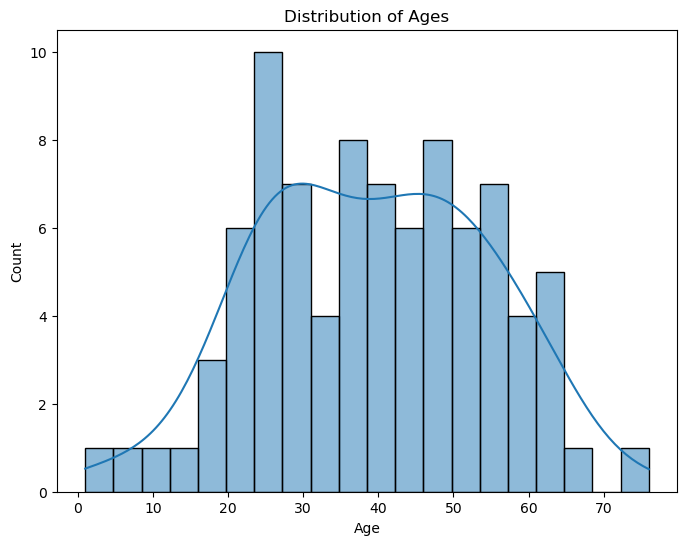

In [22]:
# Plot the distribution of ages
plt.figure(figsize=(8, 6))
sns.histplot(data=cs, x='Age', bins=20, kde=True)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

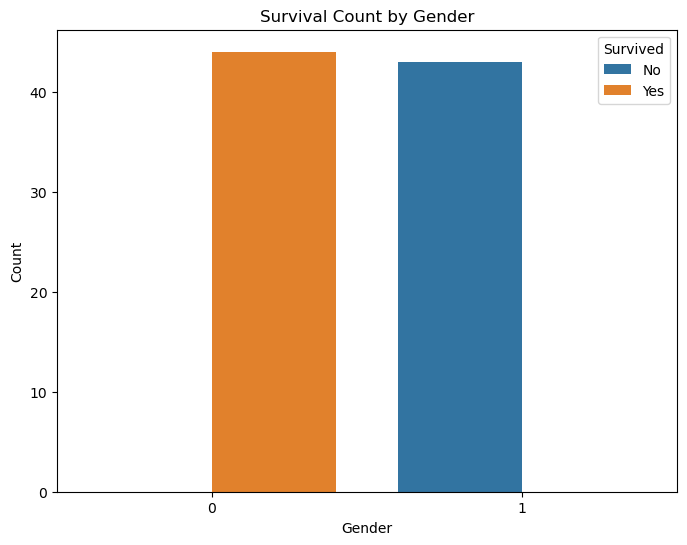

In [23]:
# Plot the survival count by gender
plt.figure(figsize=(8, 6))
sns.countplot(data=cs, x='Sex', hue='Survived')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

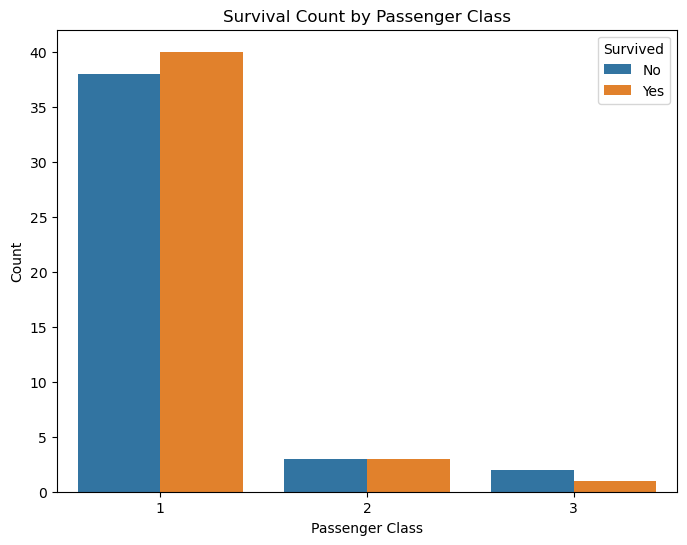

In [24]:
# Plot the survival count by passenger class
plt.figure(figsize=(8, 6))
sns.countplot(data=cs, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

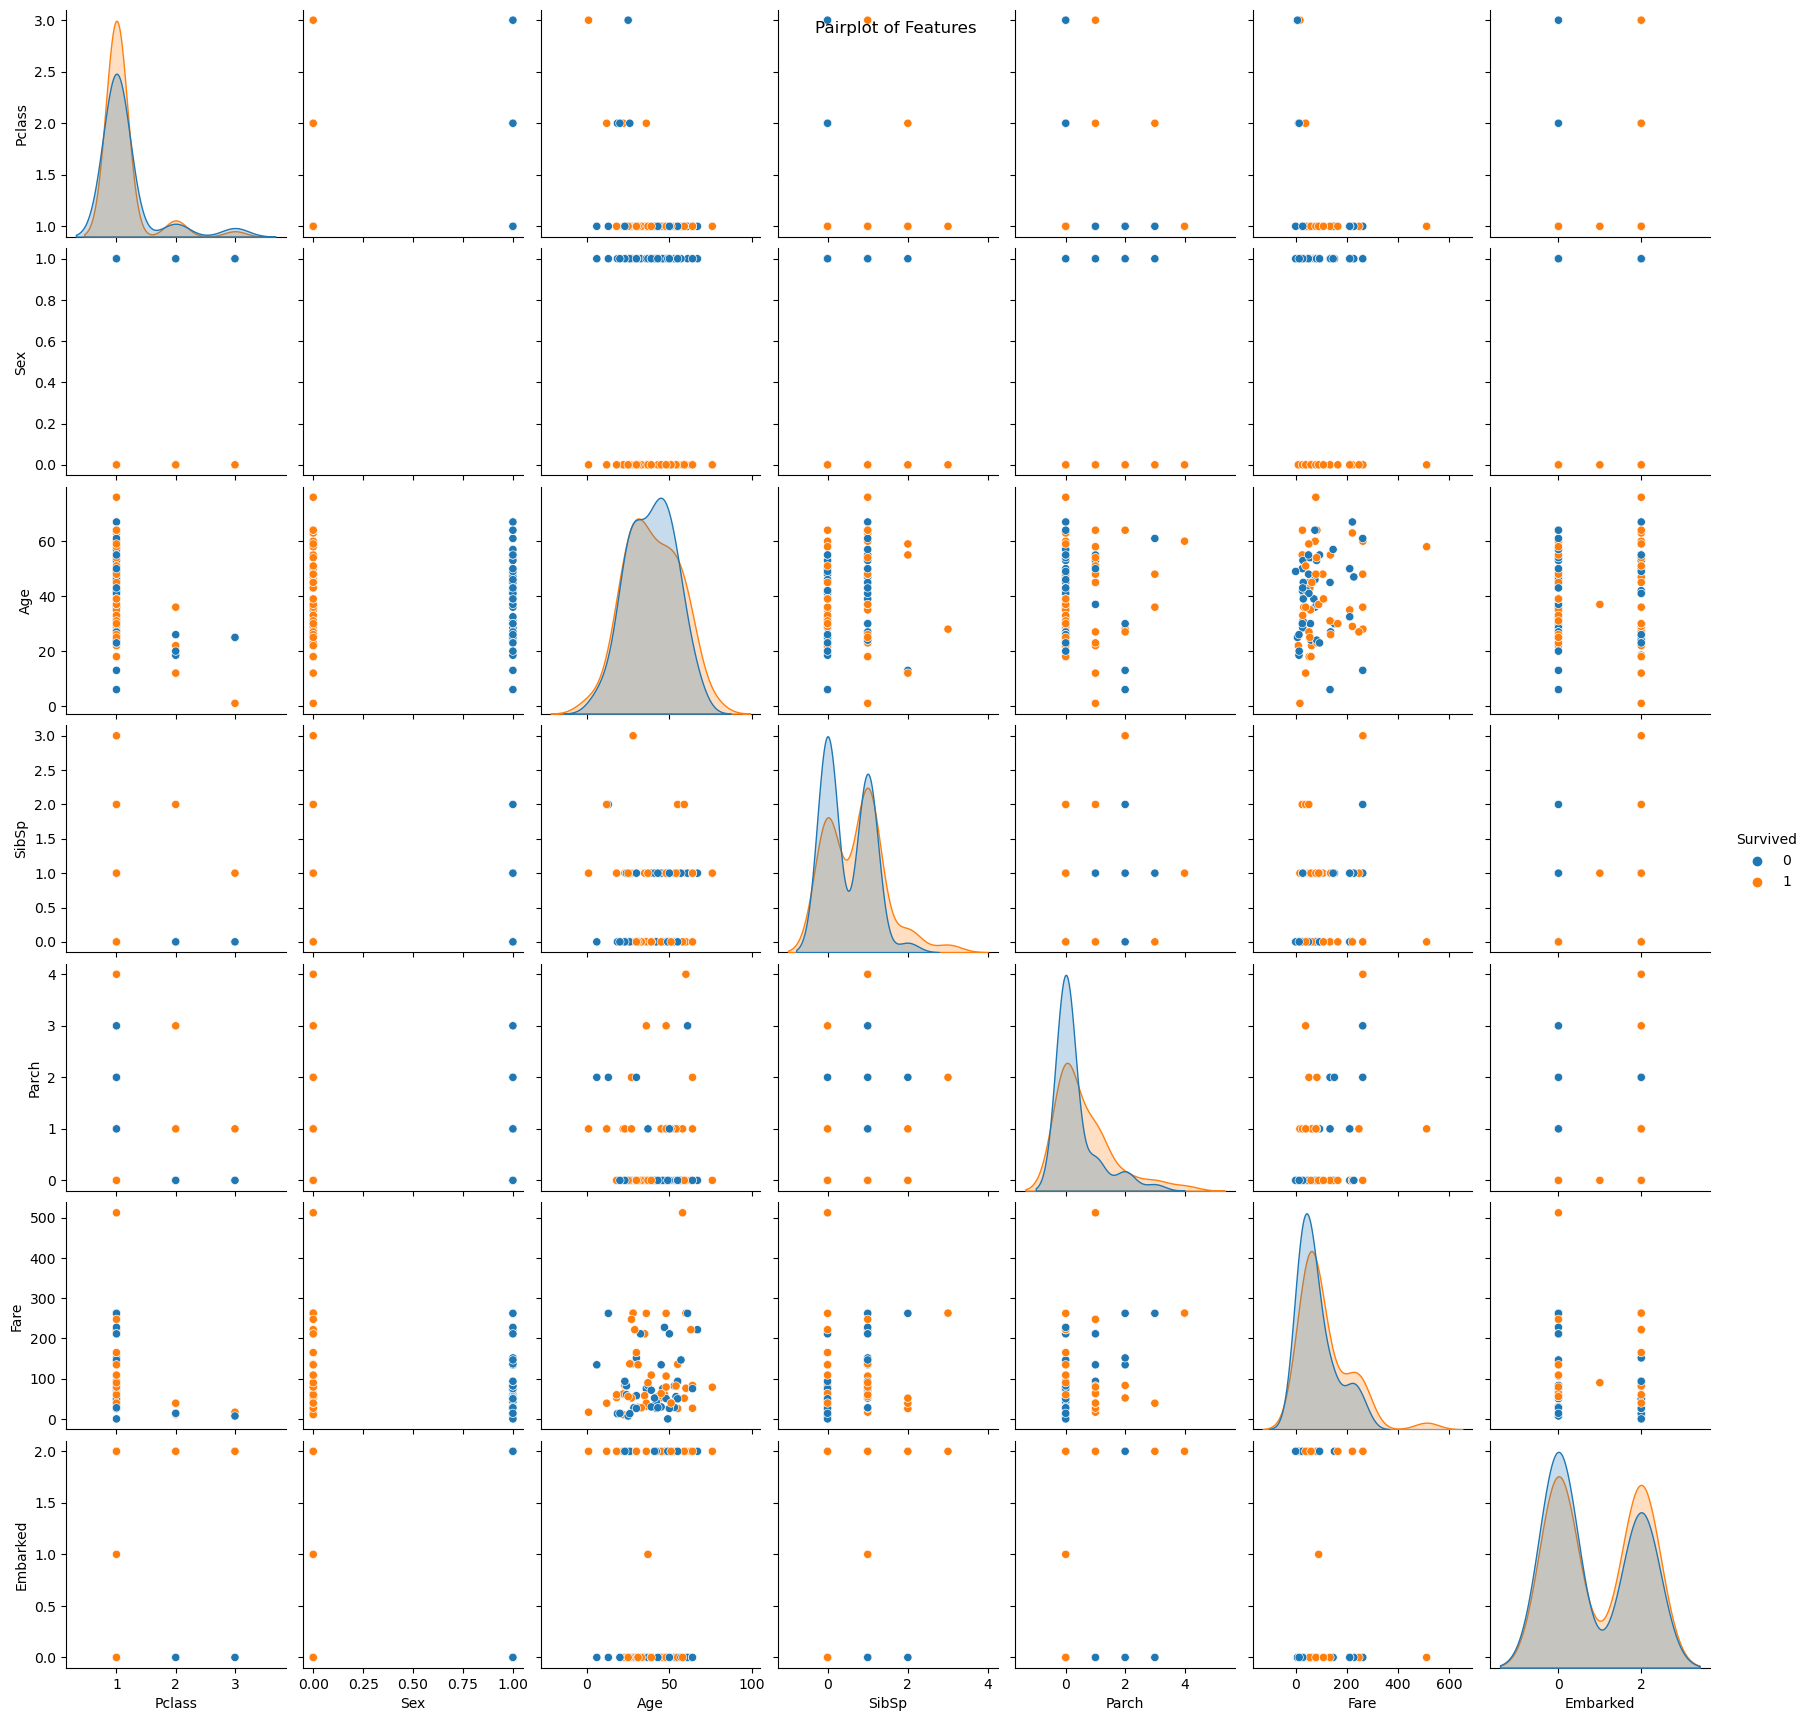

In [25]:
# Plot a pairplot
sns.pairplot(cs, hue='Survived', diag_kind='kde')
plt.suptitle('Pairplot of Features')
plt.show()

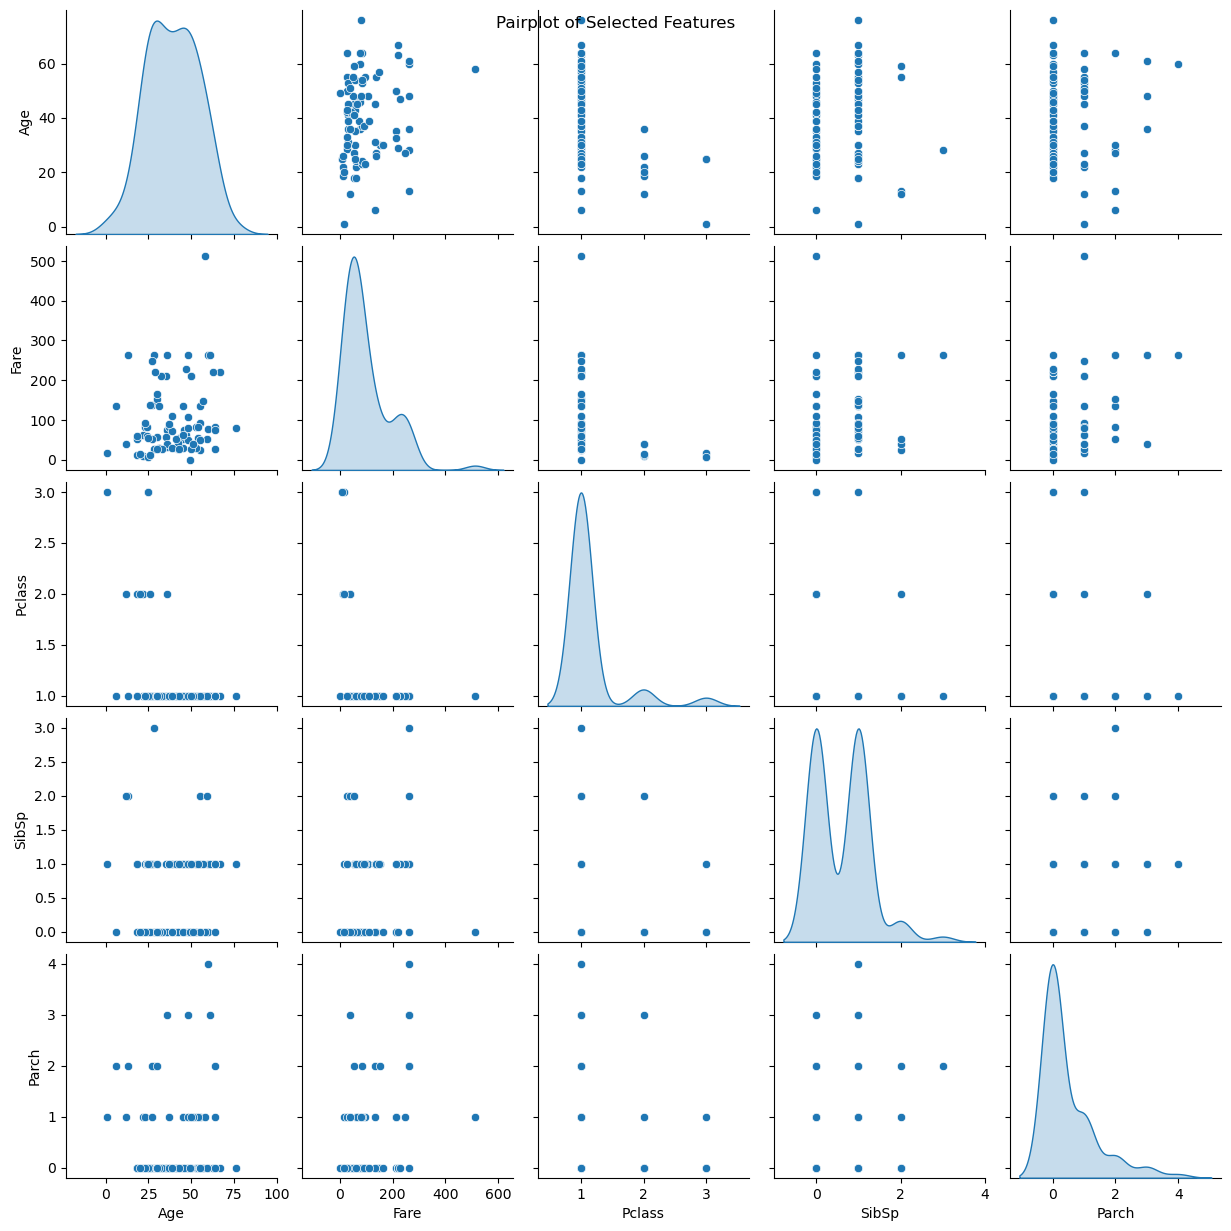

In [26]:
# Pairplot focusing on specific columns
columns_to_plot = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
sns.pairplot(cs[columns_to_plot], diag_kind='kde')
plt.suptitle('Pairplot of Selected Features')
plt.show()

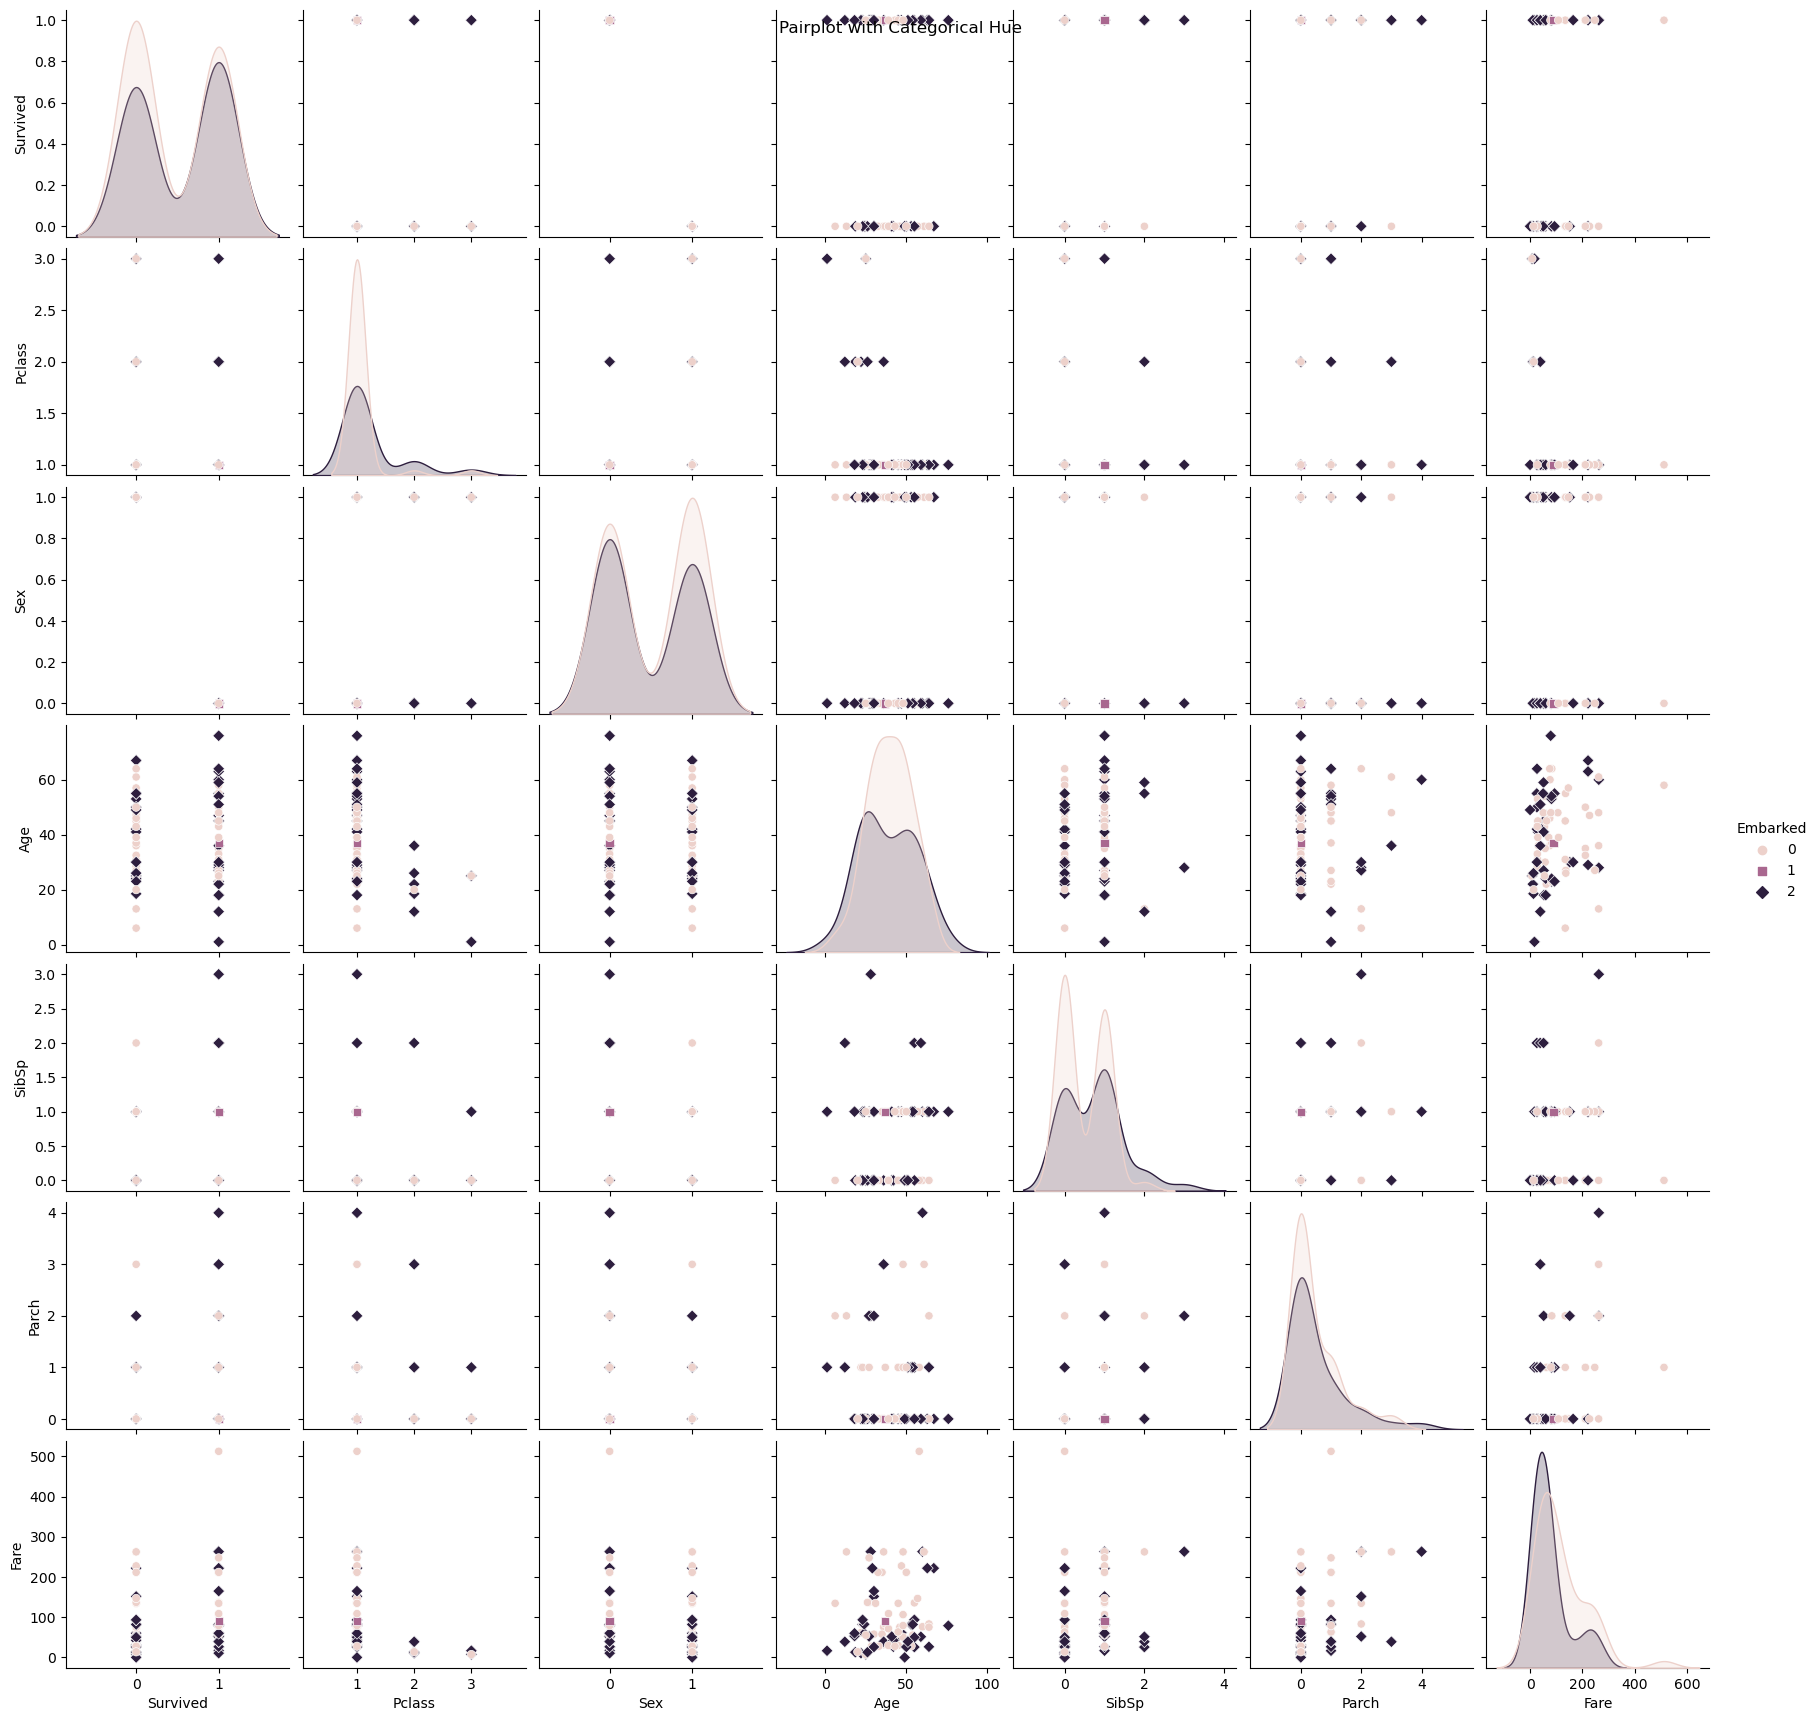

In [27]:
# Pairplot with categorical hue
sns.pairplot(cs, hue="Embarked", markers=["o", "s", "D"], diag_kind='kde')
plt.suptitle('Pairplot with Categorical Hue')
plt.show()

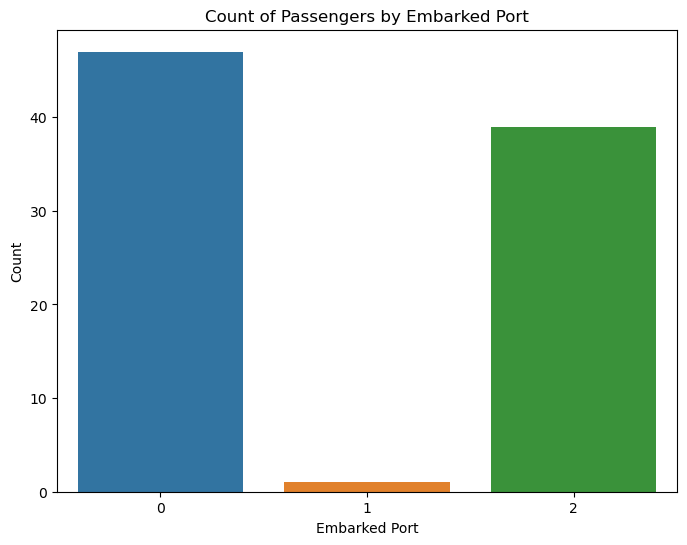

In [28]:
# Count plot of embarked ports
plt.figure(figsize=(8, 6))
sns.countplot(data=cs, x='Embarked')
plt.title('Count of Passengers by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.show()

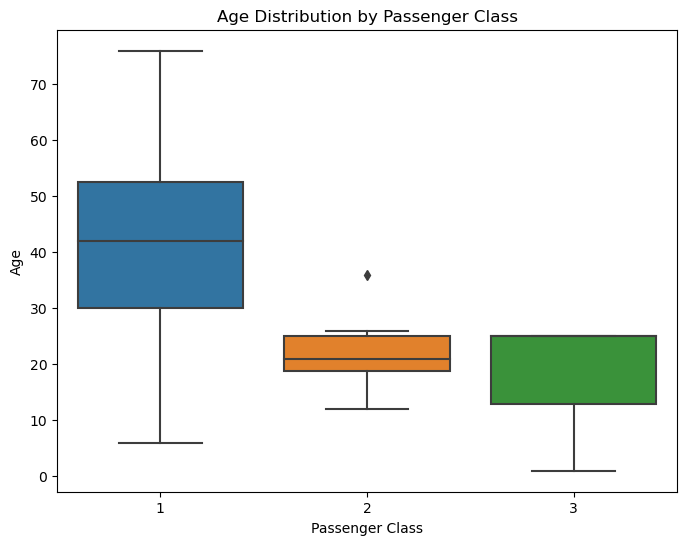

In [29]:
# Box plot of age distribution by passenger class
plt.figure(figsize=(8, 6))
sns.boxplot(data=cs, x='Pclass', y='Age')
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

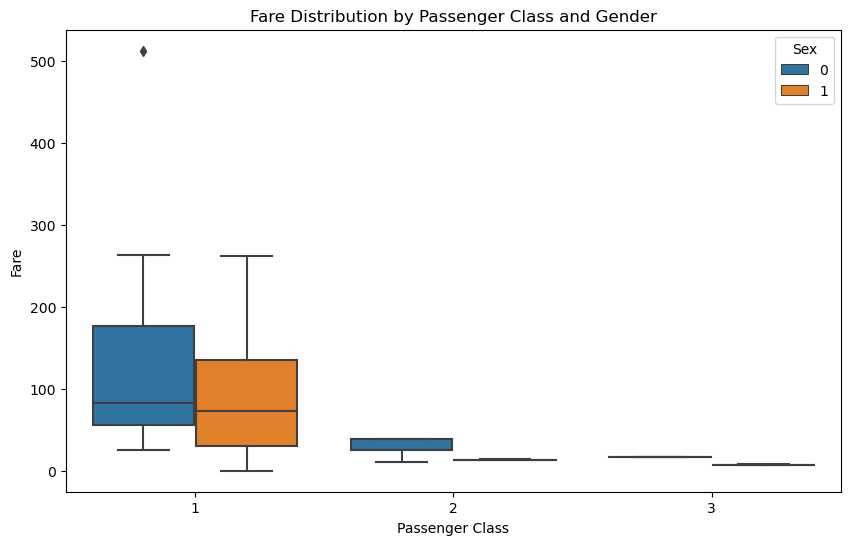

In [30]:
# Box plot of fare distribution by passenger class and gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=cs, x='Pclass', y='Fare', hue='Sex')
plt.title('Fare Distribution by Passenger Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.legend(title='Sex')
plt.show()

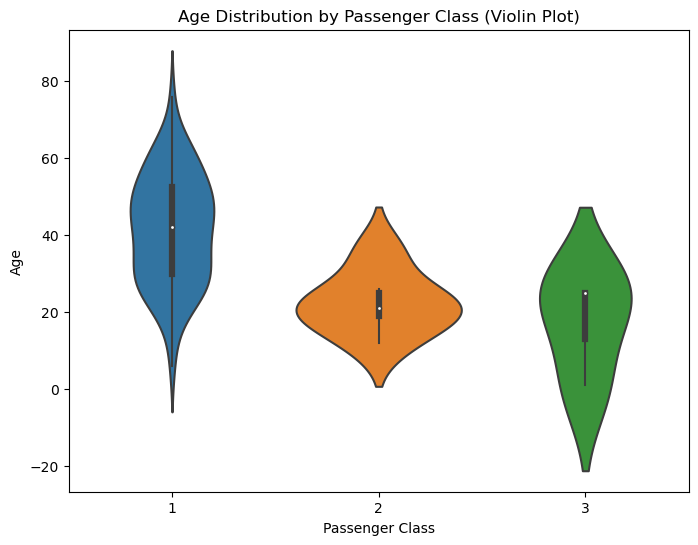

In [31]:
# Violin plot of age distribution by passenger class
plt.figure(figsize=(8, 6))
sns.violinplot(data=cs, x='Pclass', y='Age')
plt.title('Age Distribution by Passenger Class (Violin Plot)')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

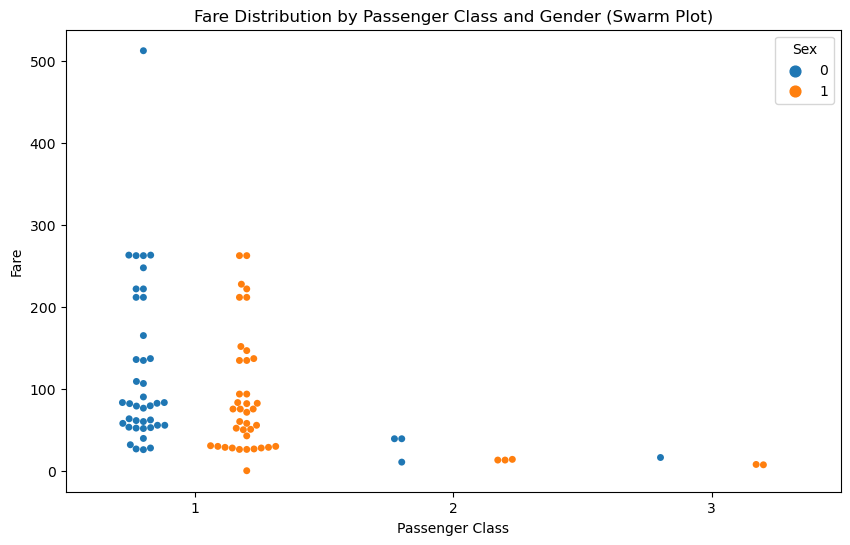

In [32]:
# Swarm plot of fare distribution by passenger class and gender
plt.figure(figsize=(10, 6))
sns.swarmplot(data=cs, x='Pclass', y='Fare', hue='Sex', dodge=True)
plt.title('Fare Distribution by Passenger Class and Gender (Swarm Plot)')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.legend(title='Sex')
plt.show()

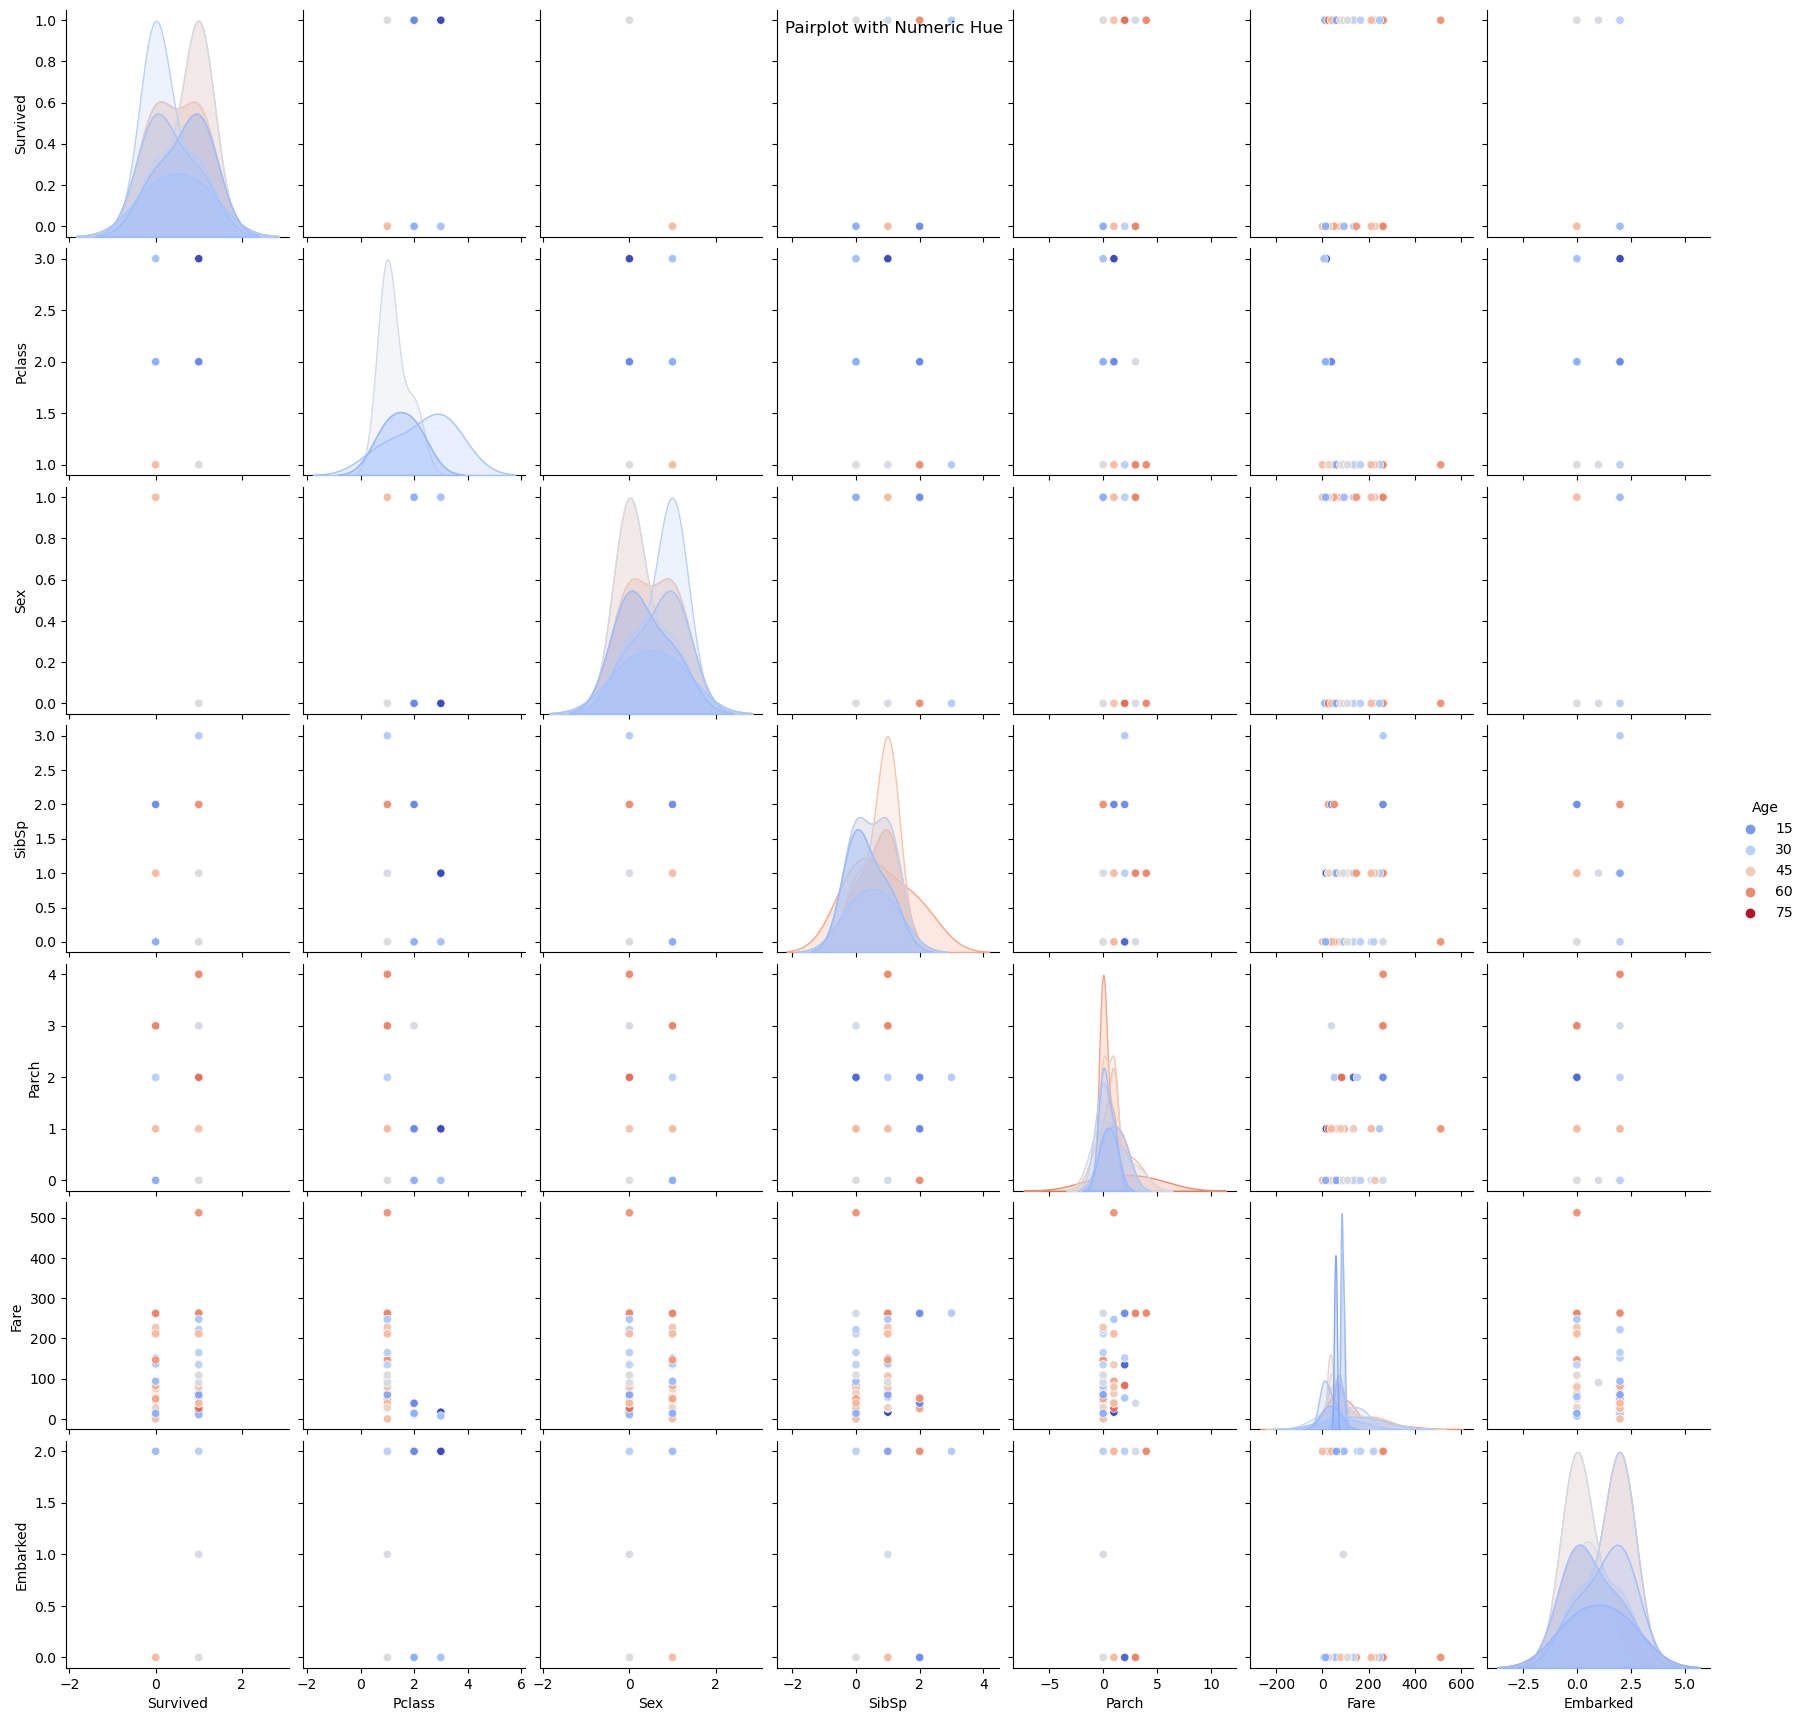

In [33]:
# Pairplot with numeric hue
sns.pairplot(cs, hue="Age", palette="coolwarm", diag_kind='kde')
plt.suptitle('Pairplot with Numeric Hue')
plt.show()

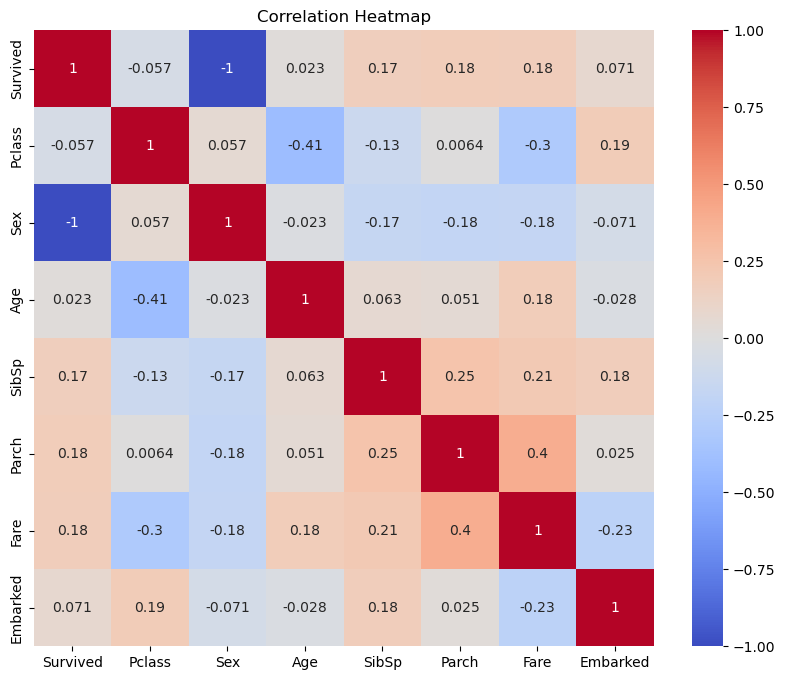

In [34]:
# Plot a correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = cs.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [35]:
# Train and evaluate different models
models = {
    'Support Vector Machines': SVC(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'Perceptron': Perceptron(),
    'Stochastic Gradient Decent': SGDClassifier(),
    'Linear SVC': LinearSVC(),
    'Decision Tree': DecisionTreeClassifier()
}


In [36]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [38]:
print(f"Model: {model_name}")
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
print("-" * 50)

Model: Decision Tree
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        10

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

--------------------------------------------------


## Conclusion

### In conclusion, the Titanic Survival Prediction project involves building and training a predictive model using historical data from the Titanic disaster. By following the steps of data collection, preprocessing, exploratory data analysis, feature engineering, model selection, and evaluation, we can create a model that predicts whether a passenger survived or not with a certain degree of accuracy. This project not only introduces beginners to fundamental data science concepts but also provides insights into the factors that influenced survival rates among Titanic passengers.